# Project 3: Stellar Atmospheres : The Physics of Why A stars have strong(est) Balmer Lines?

NAME: Lipika Chatur

UTEID: lc42977

DATE: 11/09/2022


Goals: The goal of this project is to use our understanding of the physics of stellar atmospheres to figure out why A stars (with Temperatures near 10,000 K) have very strong Balmer lines. 
Data sets: None

Points: 80


Lets begin by loading our libraries: 



In [10]:
#lets make a plots interactive
%matplotlib widget 

#Importing libraries 
import numpy as np
import matplotlib.pyplot as p
import astropy
from astropy.table import Table
import scipy.stats
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.coordinates import Galactic
from astropy.coordinates import ICRS
import astropy.coordinates as apycord
import random
from cycler import cycler
import astropy.table

#Lets set some of the default parameters for plotting. This cell is not needed but i like to style my plots.
p.rc('axes',prop_cycle=(cycler('color', ['k','b','g','r','c','m','y'])))
p.rcParams['lines.linewidth']= 1.5
p.rcParams['axes.linewidth']=2.0
#---comment (or remove) this block if you do not have latex----
p.rcParams['text.usetex']= True
p.rcParams['mathtext.fontset']= 'custom'
p.rcParams['mathtext.default']= 'rm'
p.rcParams['axes.formatter.use_mathtext']=False
#----------------------------------------
p.rcParams['font.size']= 15.0
p.rcParams['axes.labelsize']=16.0
p.rcParams['axes.unicode_minus']=False
p.rcParams['xtick.major.size']=6
p.rcParams['xtick.minor.size']=3
p.rcParams['xtick.major.width']=1.5#2.0
p.rcParams['xtick.minor.width']=1.0
p.rcParams['axes.linewidth']=2.5
p.rcParams['axes.titlesize']=20#'large'
p.rcParams['xtick.labelsize'] = 20#'x-large' # fontsize of the tick labels
p.rcParams['ytick.labelsize']=20 #'x-large'
p.rcParams['ytick.major.width']=2.0 #4
p.rcParams['ytick.minor.width']=1.0 #2.0

## Define the constants in CGS
Lets begin by defining some key constants in CGS (speed of light, boltzmaaan constant, electron mass, planck's constant, ...

In [11]:
#5pts answer here
k =  1.3807E-16 #in CGS
c = 3.0E10 #in CGS
h = 6.626176E-27 #in CGS
RH = 109678 #in CGS
e_mass = 9.1093837E-28 #in CGS

# Coding up the Boltzmann Equation
Lets write a defintion that take as input the the energy differences between two levels, the temperature of the gas and the density of states, and any other key information and outputs the ratio of the number density of atoms/ion in energy state A versus that of B. 

In [12]:
# 5pts
def Boltzmann_Eq(dE,T,g1,g2):
    y = (g2/g1) * np.exp(-(dE*(1.60218E-12))/(k*T))
    return y

Q1: Determine the ratio of the H atoms which are at N=2 vs those at N=1 for a H gas at the temperature of the solar photosphere (5777K) (2pts)


In [13]:
#insert answer / calculation here
y = Boltzmann_Eq(10.2,5777,2,8)
print(y)

5.058540777730295e-09


A1: The ratio of H atoms in n2/n1 is 5.058540777730295e-09. This means there are more atoms in the n=1 state.

Q2: Determine the ratio of the H atoms which are at N=2 vs those at N=1 for a H gas at the temperature an EXTREAMLY hot H gaseous photosphere (85,000K) (2pts)


In [14]:
#insert answer / calculation here
y = Boltzmann_Eq(10.2,85000,2,8)
print(y)

0.9938198745081865


A2: The ratio of H atoms in n2/n1 is 0.9938198745081865. Though this means there are more atoms in the n=1 state, since the ratio is super close to 1, it means that the amount of atoms in n2 and n1 are nearly equal.

## Coding up the Partition Function
In order to determine to fraction of total population of atoms/ion at N=2 we need to know the total number of atoms across all states (via the partition function). Next write a function/definition that derives the parition functions given a temperature and the number of levels (num_levels) to sum over. 

In [15]:
#10 pts
#enter answer here
#En = E0/n^2 aka 13.6/n^2 (from rydberg formula for saha eq/partition fucntion)
def partition_function(T, num_levels=2):
    Y = [] #make an empty list that we will append on to
    n = 1 #lets star n=1
  
    for i in range(num_levels):
        Y.append((2*(n**2)) * np.exp((-13.6*(1-(1/n**2))*(1.60218E-12))/(k*T)) )
        n = n+1 #this iterates n. Can also be written as n += 1         
    #print(Y) #lets print it so we can see what each iteration gives us
    return sum(Y)

Q3: What is the partition function of a pure HI gas that is 10,000K when summing over just the first 2 energy level? (2pts)

In [16]:
#enter calculation here
partition_function(10000, num_levels=2)

2.0000579022339795

A3: The partition function for first two energy levels is 2.0000579022339795.

Q4: What is the partition function of a pure HI gas that is 10,000K when summing over just the first 5 energy level? (2pts)

In [17]:
partition_function(10000,num_levels=5)

2.0000976286602703

A4: The partition function for first two energy levels is 2.0000976286602703.

Use what you have learned above to write down a function which defines the fraction of atoms in N=2 (i.e. $\frac{n2}{n1+n2}$)

In [18]:
#10 pts
#enter answer here
def Boltzmann_frac(nj,T,num_levels=2):
    y = (1/partition_function(T,num_levels=2)) * (2*nj**2) * np.exp((-13.6*(1-(1/nj**2))*(1.60218E-12))/(k*T))
    return y

Q5: Determine the fraction of atoms/ion in a pure H gas of temperature of the gas  T~85000 K that are in the fundemental state (n=1). (2pts)

In [19]:
#insert answer here; 5pts
Boltzmann_frac(1,85000,num_levels=2)

0.5015498204152815

A5: The fraction in pure H gas for T~85,000 K and at fundamental is 0.5015498204152815.


## Plotting the Boltzmann Equation

For a pure H gas, plot the fraction of atoms/ions that are in the ground (n=1) state as a function of the temperature of the gas (the temperature should range from 500 to 100,000 K). On the same figure, plot the first excited (i.e. Balmer; n=2) state using a different colored line. For this task you can sum over the first 2 energy levels for the partition function. Make sure to label your plot and provide axis labels.

Text(0.5, 1.0, 'Fraction of Atoms VS Temperature')

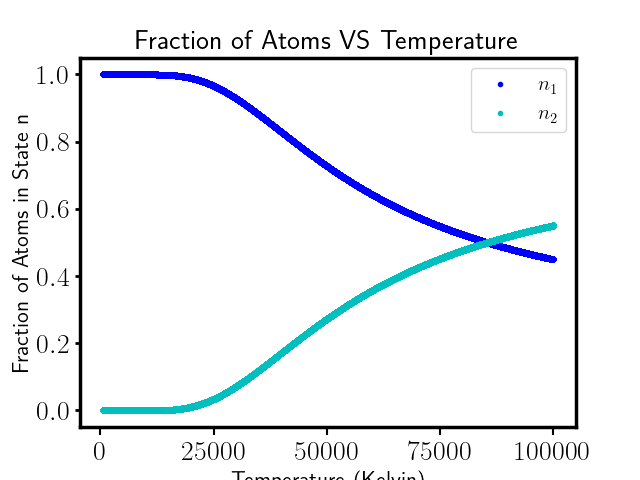

In [23]:
#insert answer here 10pts
T = np.arange(500,100000)
p.figure()
p.plot(T,Boltzmann_frac(1,T,num_levels=2),'b.', label ='$n_{1}$')
p.plot(T,Boltzmann_frac(2,T,num_levels=2),'c.', label ='$n_{2}$')
p.legend()
p.xlabel('Temperature (Kelvin)') #Ra x label
p.ylabel('Fraction of Atoms in State n') #
p.title("Fraction of Atoms VS Temperature")

# Coding up the Saha Equation
Lets write a defintion that take as input the temperature of the gas, the number of levels to sum the partition function over, the ionization energy of the H gas and the number density of electrons in the gas and outputs the ratio of the number of atoms of H in neutral vs singly ionized. 

In [43]:
# answer here 5pts

def saha_func(T,num_levels=2,xi=13.6,ne=2E12):
    ZI= partition_function(T, num_levels=2)
    ZII=1
    SII = (2*ZII/(ne*ZI)) * (((2*np.pi * e_mass *k * T) / (h**2)) **(3/2) ) * np.exp((-xi*(1.60218E-12))/(k*T))
    #SII = (k*T/200) * (((2*3.141592653589793 * e_mass *k * T) / (h**2)) **(3/2) ) * np.exp((-xi*(1.60218E-12))/(k*T))
    return SII


Q6: Using the above definition determine how much of a pure H gas at 5777K with an electron density of 10$^{12}$ cm$^{-2}$ is singly ionized. For simiplicity just sum of 2 energy levels in the partition function. (2pts)

In [44]:
#Compute Q6 here
def saha_fracI(T, num_levels,ne):
    SFI= 1/(1+saha_func(T,num_levels,ne=ne))
    return SFI

def saha_fracII(T, num_levels,ne):
    SFII= saha_func(T,num_levels,ne=ne)/(1+saha_func(T,num_levels,ne=ne))
    return SFII

saha_fracI(5777,2,1E12)

0.9985520907539821

A6: The fraction at 5,777K was 0.9985520907539821.

Q7: Using the above definition determine how much of a pure H gas at 85,000K with an electron density of 10$^{12}$ cm$^{-2}$ is singly ionized. For simiplicity just sum of 2 energy levels in the partition function. (2pts)

In [45]:
#Compute Q7 here
saha_fracI(85000,2,ne=1E12)

2.13319505719161e-10

A7: The fraction at 85,000K was 2.13319505719161e-10.

## Visualizing the Saha Equation 

For a pure H gas, plot the fraction of HI atoms as in the gas as function of the temperature of the gas (the temperature should range from 500 to 100,000 K). On the same figure (but with a different line color), plot the fraction of HII atoms as in the gas as function of the temperature of the gas (the temperature should range from 500 to 100,000 K)  For this task you can sum over the first 2 energy levels for the partition function. Make sure to label your plot and provide axis labels.

For this, assume that the pure H gas has an electron pressure of P$_e$ = 200 dyn cm$^{-2}$ (similar electron pressure in stars) and behaves like an ideal gas. 

[2.89708119e+15 2.89129859e+15 2.88553903e+15 ... 7.24378955e+13
 7.24342732e+13 7.24306513e+13]


Text(0.5, 1.0, 'Fraction of Atoms VS Temperature')

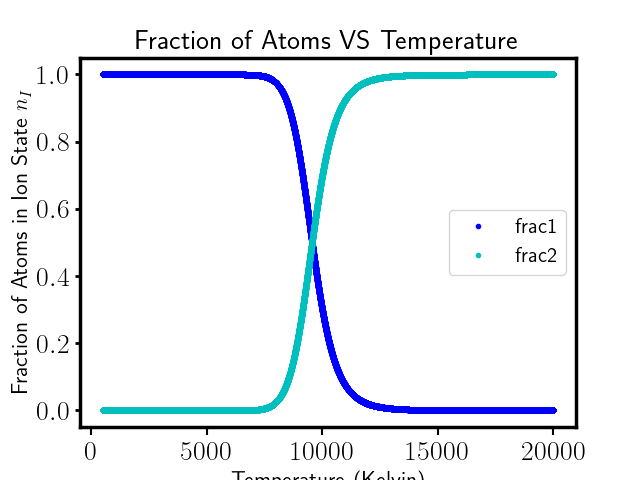

In [46]:
#insert answer here 10pts
p.figure()
T2 = np.arange(500,20000)
x = 200/(k*T2)
print(x)
p.plot(T2,saha_fracI(T2,2,x), 'b.',label ='frac1')
p.plot(T2,saha_fracII(T2,2,x),'c.',label ='frac2')
p.legend()
p.xlabel('Temperature (Kelvin)') #Ra x label
p.ylabel('Fraction of Atoms in Ion State $n_{I}$') #
p.title("Fraction of Atoms VS Temperature")

Q8: Using the above figure, at what temperature is more than 50% of this pure H gas singly ionized? (2pts)

A8: 50% of pure H gas singly ionized is at about 9,500 Kelvin.

## Putting it all Together: Visualize the Saha and Boltzmann Equations 

Now for the same gas plot the fraction of atoms at N=2 multiplied by the fraction of neutral atoms, i.e.
as a function of temperature (ranging between 500, 25,000 K)

The left hand side comes from the Boltzmann Equation while the right hand side comes from the Saha Equation.

Text(0.5, 1.0, 'Fraction of Atoms VS Temperature')

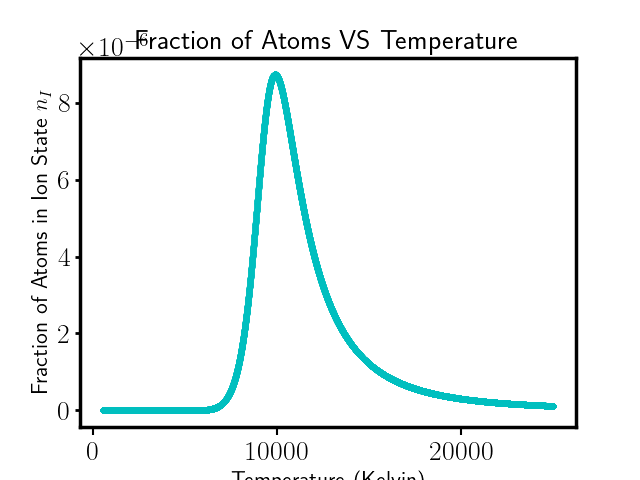

In [47]:
#10pts 
#answer here
T3 = np.arange(500,25000,1)
b = 200/(k*T3)
x = saha_fracI(T3,2,b) * Boltzmann_frac(2,T3,num_levels=2)
p.figure()
p.plot(T3,x,'c.')
p.xlabel('Temperature (Kelvin)') #Ra x label
p.ylabel('Fraction of Atoms in Ion State $n_{I}$') #
p.title("Fraction of Atoms VS Temperature")

Q9: Using the above plot, at what temperature is does the fraction of the HI multiplied by the fraction  of atoms at n=2 peak (i.e. at what temperature are the balmer lines going to be strongest). Which spectral type of star has this temperature? (4pts)


A9: At about 9500K is where the temperature peaks. This temperature matches the range of A stars.